# Retrieval based chatbot using Tensorflow with Ubuntu Dialog

- https://github.com/at15/snowbot/issues/4
- http://www.wildml.com/2016/07/deep-learning-for-chatbots-2-retrieval-based-model-tensorflow/
- https://github.com/dennybritz/chatbot-retrieval/

## TOC

- [Observation](#observation)
- [Baseline](#baseline)

## Observation <a name="observation"></a>

In [34]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

# use tfidf for base line
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
train_data = pd.read_csv('../../data/udc/train.csv')

In [5]:
train_data.Label = train_data.Label.astype('category')
train_data.describe()

,Context,Utterance,Label
count,1000000,1000000,1000000
unique,957097,736145,2
top,! op __eou__ __eot__ ? __eou__ __eot__,thank __eou__,0
freq,15,12426,500127


In [4]:
train_data.head()

,Context,Utterance,Label
0,i think we could import the old comment via rs...,basic each xfree86 upload will not forc user t...,1
1,i 'm not suggest all - onli the one you modifi...,sorri __eou__ i think it be ubuntu relat . __e...,0
2,afternoon all __eou__ not entir relat to warti...,"yep . __eou__ oh , okay . i wonder what happen...",0
3,interest __eou__ grub-instal work with / be ex...,that the one __eou__,1
4,and becaus python give mark a woodi __eou__ __...,( i think someon be go to make a joke about .a...,1


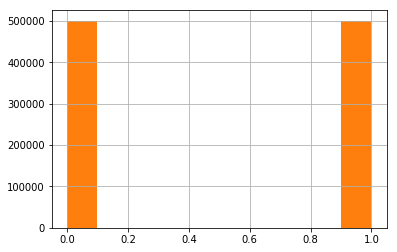

In [7]:
train_data.Label.hist()
plt.show()

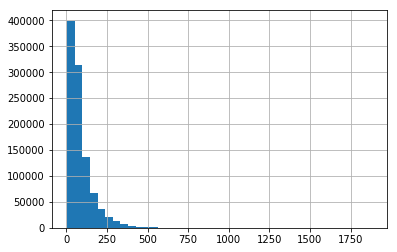

count    1000000.000000
mean          86.339195
std           74.929713
min            5.000000
25%           37.000000
50%           63.000000
75%          108.000000
max         1879.000000
Name: Context, dtype: float64

In [14]:
train_data_context_len = train_data.Context.str.split(" ").apply(len)
train_data_context_len.hist(bins=40)
plt.show()
train_data_context_len.describe()

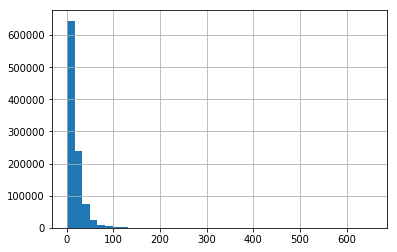

count    1000000.000000
mean          17.246392
std           16.422901
min            1.000000
25%            7.000000
50%           13.000000
75%           22.000000
max          653.000000
Name: Utterance, dtype: float64

In [15]:
train_data_utterance_len = train_data.Utterance.str.split(" ").apply(len)
train_data_utterance_len.hist(bins=40)
plt.show()
train_data_utterance_len.describe()

## Baseline <a name="baseline"></a>

In [18]:
test_data = pd.read_csv('../../data/udc/test.csv')
test_data.head()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
0,anyon know whi my stock oneir export env var u...,nice thank ! __eou__,"wrong channel for it , but check efnet.org , u...","everi time the kernel chang , you will lose vi...",ok __eou__,! nomodeset > acer __eou__ i 'm assum it be a ...,http : //www.ubuntu.com/project/about-ubuntu/d...,thx __eou__ unfortun the program be n't instal...,how can i check ? by do a recoveri for test ? ...,my humbl apolog __eou__,# ubuntu-offtop __eou__
1,i set up my hd such that i have to type a pass...,"so you dont know , ok , anyon els ? __eou__ yo...","nmap be nice , but it be n't what i be look fo...",ok __eou__,cdrom work fine on window . __eou__ i dont thi...,"ah yes , i have read return as rerun __eou__",hm ? __eou__,"not the case , lts be everi other .04 releas ....",pretti much __eou__,i use the one i download from amd __eou__,"ffmpeg be part of the packag , quixotedon , at..."
2,im tri to use ubuntu on my macbook pro retina ...,just wonder how it run __eou__,"yes , that 's what i do , export it to a `` id...",noth - i be talk about the question of myhero ...,that should fix the font be too larg __eou__,"okay , so hcitool echo back hci0 < mac address...",i get to the menu with option such as tri ubun...,whi do u need analyz __eou__ it be a toy __eou...,cntrl-c may stop the command but it doe n't fi...,"if you re onli go to run ubuntu , just get a n...",the one which be not pick up at the moment be ...
3,no suggest ? __eou__ link ? __eou__ how can i ...,you cant load anyth via usb or cd when luk be ...,-p sorri ... __eou__ nmap -p22 __eou__ it doe ...,i guess so i ca n't even launch it . __eou__,note __eou__,rxvt-unicod be one __eou__,i tar all of ~ __eou__,i tar all of ~ __eou__,"i do n't realli know if i can help , but i be ...","that work just fine , thank ! __eou__",thank you __eou__
4,i just ad a second usb printer but not sure wh...,i be set it up under the printer configur __eo...,i 'd say the most common venu would be via lau...,"the old hardi man page , http : //manpages.ubu...",i ll give a tri __eou__,"by the way , the url you post for davf be from...",http : //ubuntuforums.org/showthread.php ? t=1...,"so i load up putti gui , then what do i do ? _...","you should read error messag , it say be you r...",wait the colleg semest to close just to make s...,i be call myself a jerk . all i know be that y...


In [19]:
validation_data = pd.read_csv('../../data/udc/valid.csv')

recallk 

- pick 10 responses, 1 is correct, other 9 is random
- let the predictor pick k out of 10, if the correct one is in the k picked one, it's a correct prediction

In [30]:
def recallk(preds, k=1):
    total = len(preds)
    correct = 0
    for pred in preds:
        # the first one is the ground truth, its index is always 0
        if 0 in pred[:k]:
            correct += 1
    return correct / total

In [31]:
def predict_random():
    return np.random.permutation(np.arange(10))

In [32]:
random_predictions = [predict_random() for _ in range(len(test_data))]

In [33]:
for k in [1, 2, 3, 10]:
    print('Recall k={} accuracy: {}'.format(k, recallk(random_predictions, k)))

Recall k=1 accuracy: 0.0989429175475687
Recall k=2 accuracy: 0.19640591966173362
Recall k=3 accuracy: 0.29365750528541223
Recall k=10 accuracy: 1.0


In [35]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(np.append(train_data.Context.values, train_data.Utterance.values))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
tfidf_vectorizer.transform(["this is ubuntu"])

<1x432657 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [38]:
def predict_tfidf(context, utterances, debug=False):
    # vectorize, NOTE: wrap context with [] instead of just a string, sklearn expect iterable string
    # [1 x n] where n is size of dictionary
    vec_context = tfidf_vectorizer.transform([context])
    # [10 x n] 10 beause we have 1 ground truth and 9 ex
    vec_doc = tfidf_vectorizer.transform(utterances)
    if debug:
        print(vec_context.shape, vec_doc.shape)
    # use dot product to measure similarity of the resulting vectors
    result = np.dot(vec_doc, vec_context.T).todense()
    result = np.asarray(result).flatten()
    return np.argsort(result, axis=0)[::-1]

In [39]:
predict_tfidf(test_data.Context[0], test_data.iloc[0, 1:].values, True)

(1, 432657) (10, 432657)


array([6, 7, 0, 4, 1, 2, 8, 3, 9, 5])

In [41]:
tfidf_predictions = []
for i in range(len(test_data)):
    tfidf_predictions.append(predict_tfidf(test_data.Context[i], test_data.iloc[i, 1:].values))

In [42]:
for k in [1, 2, 3, 10]:
    print('Recall k={} accuracy: {}'.format(k, recallk(tfidf_predictions, k)))

Recall k=1 accuracy: 0.4950317124735729
Recall k=2 accuracy: 0.5968816067653276
Recall k=3 accuracy: 0.6589323467230443
Recall k=10 accuracy: 1.0


TODO: but how to use this in a real bot? you can't run dot product over all possible response right?